In [23]:
import pandas as pd
import numpy as np

%matplotlib inline

## Reading the E-Commerce Dataset

### Q1 (3 Points): Load the Dataset

Load the ecommerce dataset into a DataFrame.

In [24]:
data       = pd.read_csv("E-Commerce.csv")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_ID         3660 non-null   object 
 1   Product_ID      3660 non-null   object 
 2   Category        3650 non-null   object 
 3   Price (Rs.)     3660 non-null   float64
 4   Discount (%)    3660 non-null   int64  
 5   Final_Price     3660 non-null   float64
 6   Payment_Method  3660 non-null   object 
 7   Purchase_Date   3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


#### Also, we can use pandas.api.types.is_numeric_dtype to count the number of numerical and none-numerical variables 

In [26]:
from pandas.api.types import is_numeric_dtype
n=0
for c in data.columns:
    if is_numeric_dtype(data[c]): n+=1
print('numerical variables:', n, 'none-numerical variables:',len(data.columns)-n)

numerical variables: 3 none-numerical variables: 5


### Q2 (17 Points): Data Exploration

Answer the following questions based on the dataset:

Find the total number of observations (rows). (3 pts)

Find the total number of variables (columns). (3 pts)

Find the number of numerical and non-numerical variables. (6 pts)

Find if there are any columns with missing values. (5 pts)

In [27]:
# 1. Total number of observations
num_rows = data.shape[0]
print("Total number of observations (rows):", num_rows)

# 2. Total number of variables
num_columns = data.shape[1]
print("Total number of variables (columns):", num_columns)

# 3. Numerical and non-numerical variables
num_numerical = len(data.select_dtypes(include=['number']).columns)
num_non_numerical = len(data.select_dtypes(exclude=['number']).columns)
print("Number of numerical variables:", num_numerical)
print("Number of non-numerical variables:", num_non_numerical)

# 4. Columns with missing values
missing_values = data.isnull().sum().loc[lambda x: x > 0].count()
print("Number of columns with missing values:", missing_values)

Total number of observations (rows): 3660
Total number of variables (columns): 8
Number of numerical variables: 3
Number of non-numerical variables: 5
Number of columns with missing values: 1


## Q3 Preparing data for analytics (20 pts)

a. Handle rows with missing values (5 pts)

b. Rename the column heading from 'Purchase_Date' to 'Date_of_Purchase' (5 pts)

c. Create a new column 'Purchase Month' from the value in the column of 'Date_of_Purchase' (5 pts)

d. Group the data of customers by the Payment_Method (5 pts)

In [28]:
data.isnull().sum()

User_ID            0
Product_ID         0
Category          10
Price (Rs.)        0
Discount (%)       0
Final_Price        0
Payment_Method     0
Purchase_Date      0
dtype: int64

In [29]:
data.dropna(subset=['Category'], inplace=True)

In [30]:
# Rename the column heading from 'Purchase_Date' to 'Date_of_Purchase' (5 pts)
data.rename(columns={"Purchase_Date": "Date_of_Purchase"}, inplace=True)
data

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price,Payment_Method,Date_of_Purchase
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024
...,...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI,14-05-2024
3656,34ebc1a0,08838c2c-9,Toys,212.87,15,180.94,Cash on Delivery,19-11-2024
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking,07-08-2024
3658,0611293d,b4f67f96-9,Electronics,447.66,30,313.36,UPI,21-05-2024


In [31]:
# Convert the 'Date_of_Purchase' column to datetime format (if not already done)
data['Date_of_Purchase'] = pd.to_datetime(data['Date_of_Purchase'], errors='coerce')

# Create a new column 'Discharge Month' by extracting the month name
data['Purchase Month'] = data['Date_of_Purchase'].dt.month_name()

# Display the updated DataFrame
data.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price,Payment_Method,Date_of_Purchase,Purchase Month
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,2024-12-11,December
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,2024-09-02,September
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,2024-01-09,January
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,2024-01-04,January
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,NaT,NaN


In [32]:
# Group the data by 'Payment_Method'
grouped_data = data.groupby('Payment_Method')

# Display aggregated data, e.g., count of patients in each condition
grouped_summary = grouped_data.size().reset_index(name='Customer Count')

# Display the grouped summary
print(grouped_summary)

     Payment_Method  Customer Count
0  Cash on Delivery             693
1       Credit Card             758
2        Debit Card             728
3       Net Banking             715
4               UPI             756


## Q4 (20 Points): Data Visualization

Use data visualization to perform the following tasks:

Show the number of products purchased in each category. (5 pts)

Show the total final price for each payment method. (5 pts)

Plot the average final price across different product categories. (5 pts)

Analyze sales trends over time. (5pts)

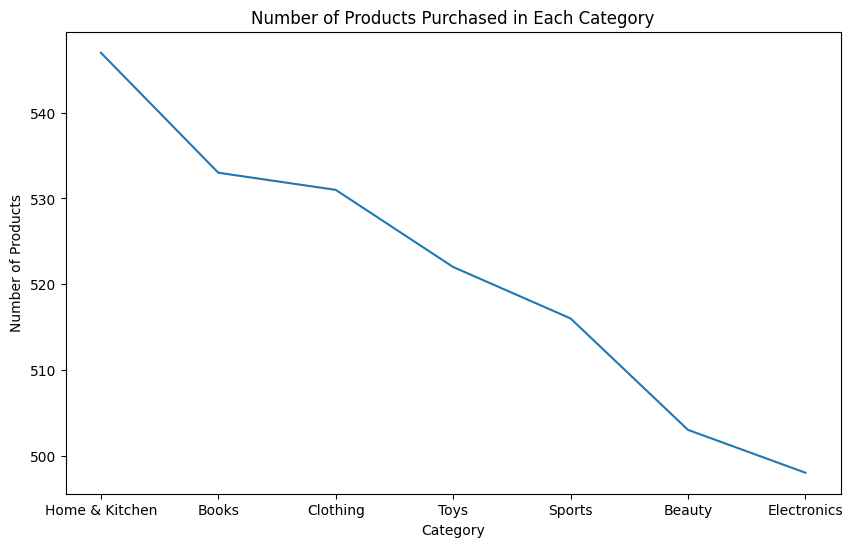

In [38]:
# 2. Show the number of products purchased in each category
import matplotlib.pyplot as plt

# Show the number of products purchased in each category
products_per_category = data['Category'].value_counts()
products_per_category.plot(kind='line', figsize=(10, 6))
plt.title('Number of Products Purchased in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

<Axes: title={'center': 'Total Final Price for Each Payment Method'}, xlabel='Payment Method', ylabel='Total Final Price'>

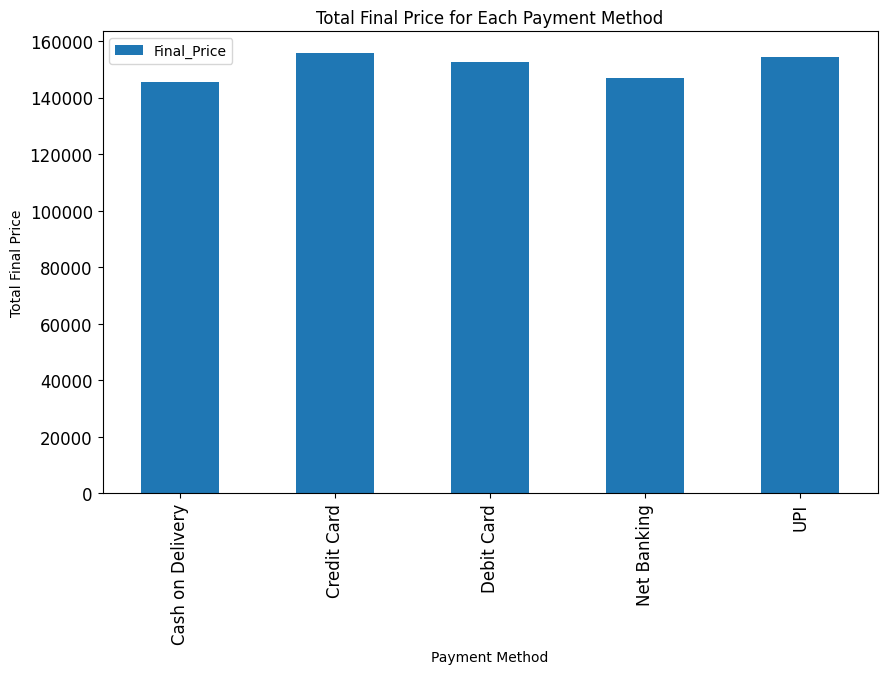

In [40]:
# 3. Show the total final price for each payment method
total_price_per_payment = data[['Payment_Method', 'Final_Price']].groupby('Payment_Method').sum()
total_price_per_payment.plot(kind='bar', figsize=(10, 6), y='Final_Price', fontsize=12, xlabel='Payment Method', ylabel='Total Final Price', title='Total Final Price for Each Payment Method')

<Axes: title={'center': 'Average Final Price Across Different Product Categories'}, xlabel='Category', ylabel='Average Final Price'>

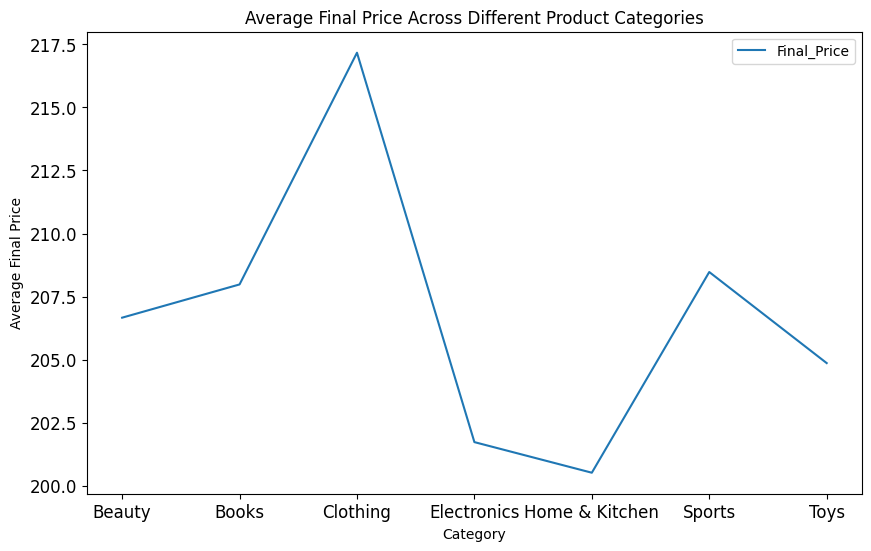

In [53]:
# 4. Plot the average final price across different product categories
avg_price_per_category = data[['Category', 'Final_Price']].groupby('Category').mean()
avg_price_per_category.plot(kind='line', figsize=(10, 6), y='Final_Price', fontsize=12, xlabel='Category', ylabel='Average Final Price', title='Average Final Price Across Different Product Categories')

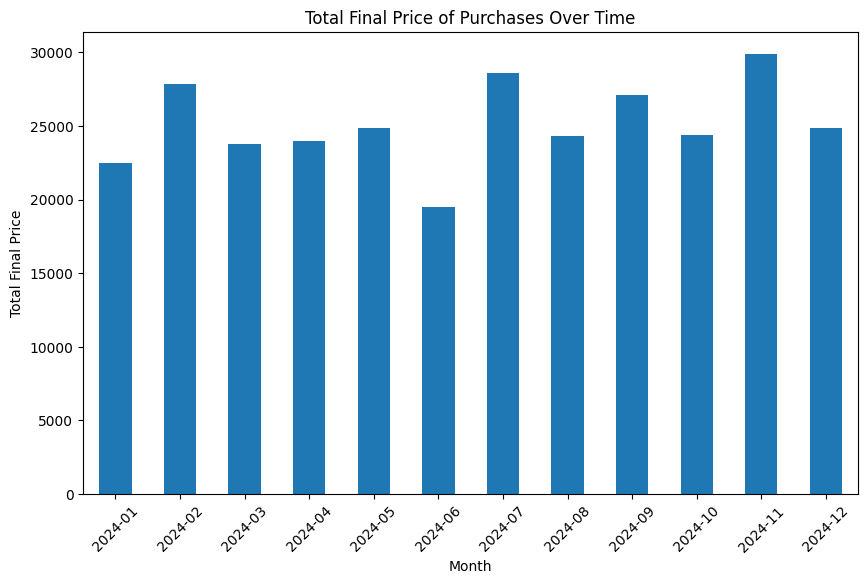

In [57]:
# Convert 'Date_of_Purchase' to datetime format
data['Date_of_Purchase'] = pd.to_datetime(data['Date_of_Purchase'], errors='coerce')

# Group by month instead of daily to reduce noise
sales_over_time = data.groupby(data['Date_of_Purchase'].dt.to_period('M'))['Final_Price'].sum()

# Plot as a bar chart
sales_over_time.plot(kind='bar', figsize=(10, 6), xlabel='Month', ylabel='Total Final Price', title='Total Final Price of Purchases Over Time')
plt.xticks(rotation=45)
plt.show()


## Q5 (15 Points): Advanced Data Exploration

Identify the product with the highest final price. (5 pts)

Find the average discount percentage for products in the dataset. (5 pts)

Identify the top 3 payment methods used by customers. (5 pts)

In [43]:
# 1. Identify the product with the highest final price
highest_price_product = data.loc[data['Final_Price'].idxmax()]
print("Product with the highest final price:\n", highest_price_product)

Product with the highest final price:
 User_ID                   8b885340
Product_ID              5a4c2797-7
Category            Home & Kitchen
Price (Rs.)                 496.82
Discount (%)                     0
Final_Price                 496.82
Payment_Method          Debit Card
Date_of_Purchase               NaT
Purchase Month                 NaN
Name: 1116, dtype: object


In [44]:
# 2. Find the average discount percentage for products in the dataset
avg_discount = data['Discount (%)'].mean()
print("Average discount percentage:", avg_discount)

Average discount percentage: 18.827397260273973


In [45]:
# 3. Identify the top 3 payment methods used by customers
top_payment_methods = data['Payment_Method'].value_counts().head(3)
print("Top 3 payment methods used by customers:\n", top_payment_methods)

Top 3 payment methods used by customers:
 Payment_Method
Credit Card    758
UPI            756
Debit Card     728
Name: count, dtype: int64


## Q6 (10 Points): Data Analysis Using Aggregations

Calculate the total number of unique users in the dataset. (5 pts)

Find the top 3 product categories with the highest total sales. (5 pts)

In [46]:
# 1. Calculate the total number of unique users in the dataset
unique_users = data['User_ID'].nunique()
print("Total number of unique users:", unique_users)

Total number of unique users: 3650


In [47]:
# 2. Find the top 3 product categories with the highest total sales
top_categories = data.groupby('Category')['Final_Price'].sum().sort_values(ascending=False).head(3)
print("Top 3 product categories with highest total sales:\n", top_categories)

Top 3 product categories with highest total sales:
 Category
Clothing          115314.84
Books             110853.94
Home & Kitchen    109683.50
Name: Final_Price, dtype: float64
